In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from boxes import BoxCollection
from path_planning import build_optimal_control, initial_safety_sequence

# Offline preprocessing

In [3]:
# Generate random safe boxes.
d = 2
env_side = 10
box_sides = [2, .5]
B = BoxCollection.generate_grid(d, env_side, box_sides, seed=0)

# Compute line graph with optimal representative points.
G = B.line_graph('optimize')

<IPython.core.display.Javascript object>


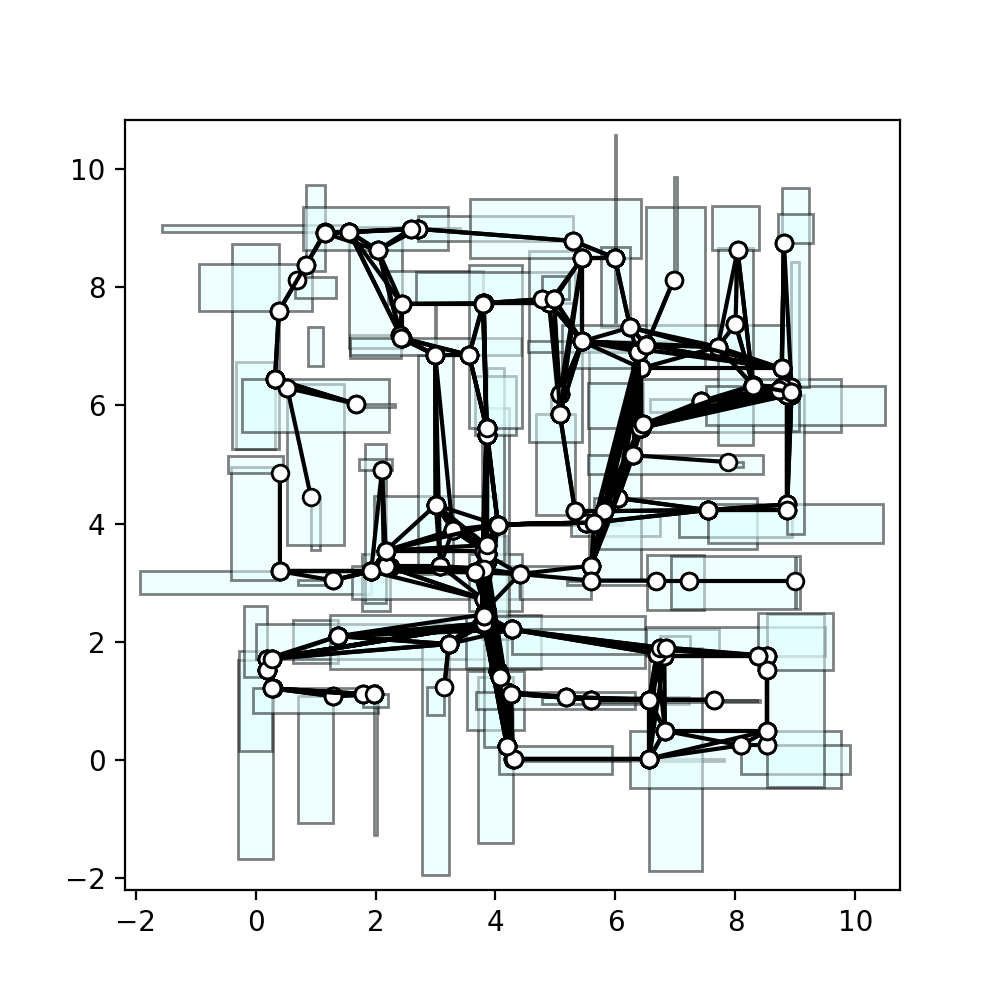

In [4]:
plt.figure(figsize=(5, 5))
B.plot2d(alpha=.5)
G.plot()

In [5]:
# Build quadratic program for optimal-control problems.
T = env_side
N = env_side * 10
lam = [0, 0, 1]
solver = 'OSQP'
path_planner = build_optimal_control(B, T, N, lam, verbose=True, solver=solver)

# Online shortest-path problem

In [6]:
# Initial and final positions.
start = np.zeros(2)
goal = np.ones(2) * (env_side - 1)

In [7]:
# All-to-one shortest path for a fixed goal location.
discrete_planner, runtime = G.shortest_path(goal)
runtime

0.001814126968383789

In [8]:
# Given start location, finds initial box sequence.
box_seq, length, runtime = discrete_planner(start)
length, runtime

(15.084493693103083, 0.00022792816162109375)

<IPython.core.display.Javascript object>


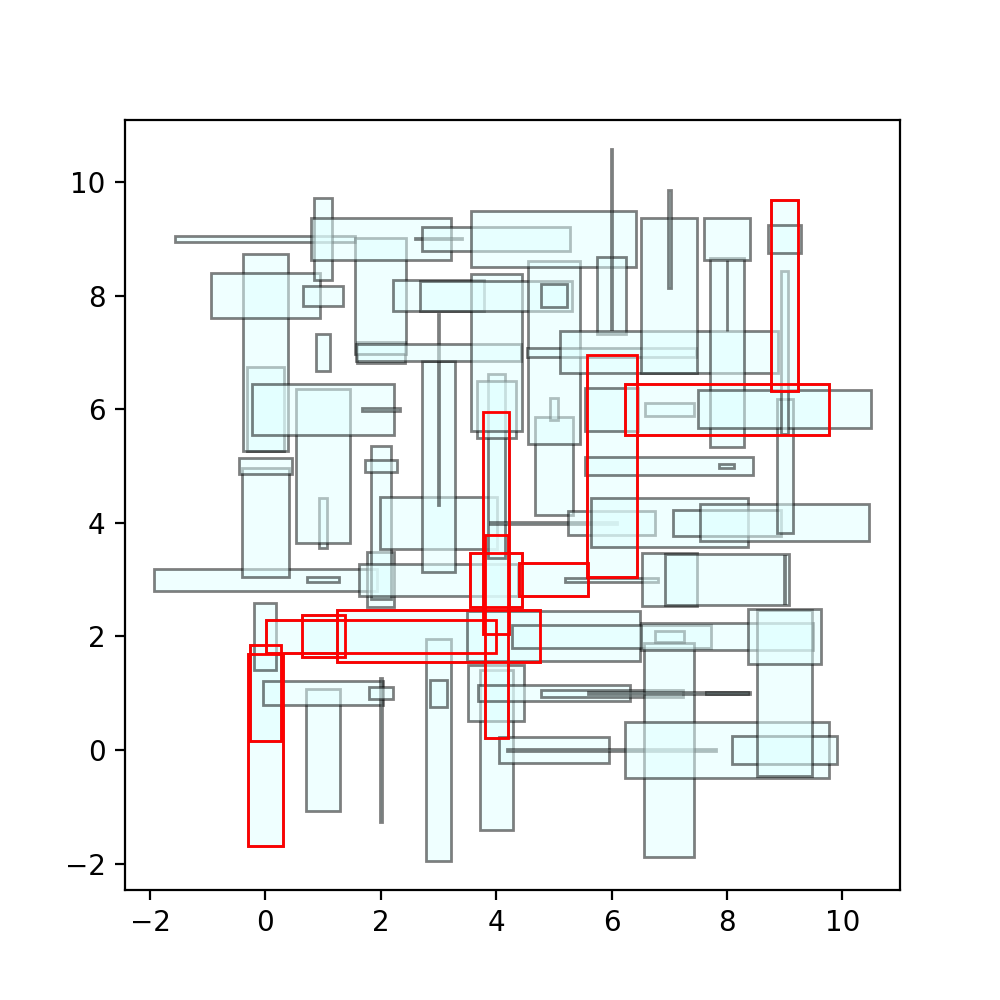

In [9]:
plt.figure(figsize=(5, 5))
B.plot2d(alpha=.5)
B.plot2d(subset=box_seq, fc='None', ec='r')

# Online optimal-control problems

In [10]:
# Sample the Dijkstra path to get initial safety sequence.
safety_seq = initial_safety_sequence(G, N, start, goal, box_seq)

# Solve sequence of optimal-control problems.
cost, path, safety_seq, solver_time = path_planner(start, goal, safety_seq)
cost, solver_time

Cost: 1.4326810889223243
Solver time: 0.16034215
Cost: 1.385427797476334
Solver time: 0.037536382


(1.385427797476334, 0.197878532)

<IPython.core.display.Javascript object>


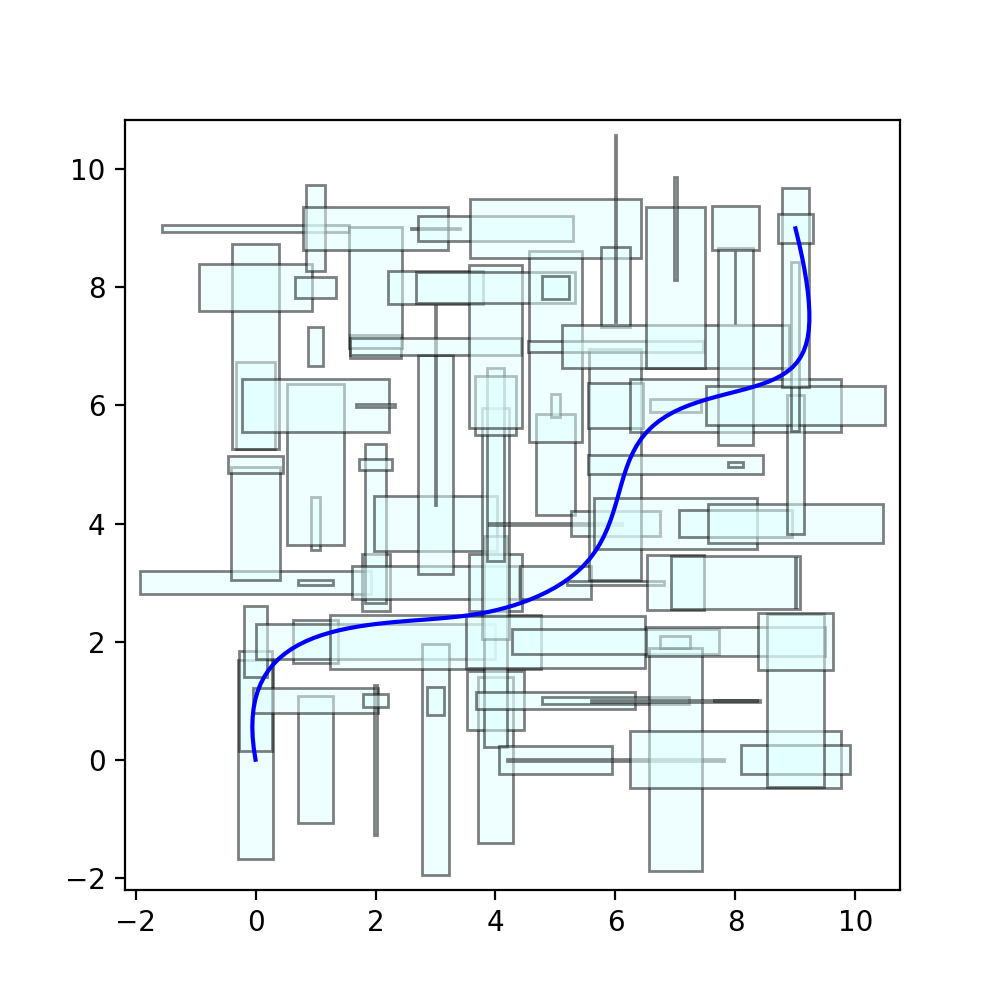

In [11]:
plt.figure(figsize=(5, 5))
B.plot2d(alpha=.5)
plt.plot(*path.T, c='b')